In [1]:
!git clone https://github.com/rickiepark/GDL_code.git

Cloning into 'GDL_code'...
remote: Enumerating objects: 487, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 487 (delta 1), reused 5 (delta 1), pack-reused 480
Receiving objects: 100% (487/487), 178.51 MiB | 13.88 MiB/s, done.
Resolving deltas: 100% (225/225), done.
Checking out files: 100% (77/77), done.


In [2]:
%cd GDL_code

/content/GDL_code


In [16]:
!pip install "matplotlib==3.0.2"

     |████████████████████████████████| 12.9 MB 2.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 96 kB 4.0 MB/s 
     |████████████████████████████████| 157 kB 29.6 MB/s 
     |████████████████████████████████| 701 kB 62.3 MB/s 
     |████████████████████████████████| 10.6 MB 28.9 MB/s 
     |████████████████████████████████| 2.8 MB 78.5 MB/s 
     |████████████████████████████████| 113 kB 78.5 MB/s 
     |████████████████████████████████| 768 kB 63.2 MB/s 
     |████████████████████████████████| 111 kB 70.4 MB/s 
     |████████████████████████████████| 177 kB 67.4 MB/s 
     |████████████████████████████████| 126 kB 78.1 MB/s 
     |████████████████████████████████| 89 kB 10.4 MB/s 
     |████████████████████████████████| 126 kB 61.4 MB/s 
     |████████████████████████████████| 312 kB 66.2 MB/s 
     |████████████████████████████████| 51 kB 669 kB/s 
     |████████████████████████████████| 59 kB 7.5 MB/s 
     |████████████████████████████████| 89 kB 11.1 MB/s 
     |████████████████████████████████| 89 kB 11.4 MB/s 
     |████████████████

In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

170508288/170498071 [==============================] - 11s 0us/step


--------------------------------------------------------------------------------------- Sequential 모델 사용한 Network ------------------------------------------------------------------------------------------

In [5]:
# Sequential 모델 사용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


model = Sequential([
                    Dense(200, activation = 'relu', input_shape=(32,32,3)),
                    Flatten(),
                    Dense(250, activation='relu',),
                    Dense(10, activation='softmax'),
])

In [6]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr = 5e-4)
model.compile(loss= 'categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
model.fit(x_train, y_train,
          batch_size = 32, 
          epochs = 10, 
          shuffle = True,)

Epoch 1/10
1563/1563 [==============================] - 18s 10ms/step - loss: 1.6699 - accuracy: 0.4180
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4159 - accuracy: 0.5030
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3238 - accuracy: 0.5363
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2596 - accuracy: 0.5575
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2010 - accuracy: 0.5793
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1489 - accuracy: 0.5959
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0972 - accuracy: 0.6150
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0488 - accuracy: 0.6313
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0012 - accuracy: 0.6477
Epoch 10/10
1563/1563 [==============================] - 16s 10m

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.3650 - accuracy: 0.5332


[1.3650453090667725, 0.5332000255584717]

In [10]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

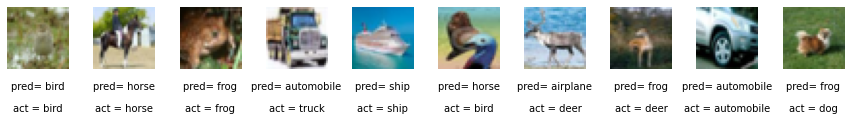

In [18]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred= ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = '+str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

------------------------------------------------------------------------------------------- 함수형 API 사용한 Network ----------------------------------------------------------------------------------------------

In [19]:
# 함수형 API 사용

from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(32, 32, 3 ))

x = Flatten()(input_layer)

s = Dense(units=200, activation = 'relu')(x)
x = Dense(units = 250, activation = 'relu')(x)

output_layer = Dense(units = 10, activation = 'softmax')(x)

model1 = Model(input_layer, output_layer)

In [21]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr = 5e-4)
model1.compile(loss= 'categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
model1.fit(x_train, y_train,
          batch_size = 32, 
          epochs = 10, 
          shuffle = True,)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8682 - accuracy: 0.3358
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6937 - accuracy: 0.3991
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6258 - accuracy: 0.4250
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5803 - accuracy: 0.4418
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5510 - accuracy: 0.4525
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5244 - accuracy: 0.4603
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5001 - accuracy: 0.4679
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4775 - accuracy: 0.4749
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4595 - accuracy: 0.4848
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.445

In [24]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4912 - accuracy: 0.4720


[1.4911770820617676, 0.47200000286102295]

In [26]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog','horse','ship','truck'])

preds = model1.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

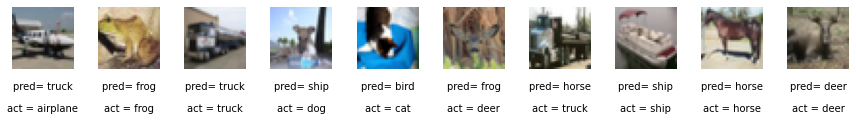

In [27]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred= ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = '+str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

-----------------합성곱, 배치정규화, 드롭아웃 ---------------------

In [29]:
from tensorflow.keras import layers

input_layer = Input((32,32,3))

x = layers.Conv2D(filters=32, kernel_size =3, strides = 1, padding = 'same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3 , strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

In [31]:
opt = Adam(5e-4)

model.compile(loss = 'categorical_crossentropy', 
              optimizer = opt,
              metrics=['acc'])

In [32]:
model.fit(x_train, y_train,
          batch_size= 32,
          epochs=10,
          shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 21s 8ms/step - loss: 1.5319 - acc: 0.4637
Epoch 2/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1300 - acc: 0.6024
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9871 - acc: 0.6539
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9049 - acc: 0.6832
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8462 - acc: 0.7055
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7908 - acc: 0.7237
Epoch 7/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7517 - acc: 0.7347
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7087 - acc: 0.7541
Epoch 9/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.6769 - acc: 0.7621
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6429 - acc: 0.7757


In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8319 - acc: 0.7113


[0.8319026231765747, 0.7113000154495239]

In [35]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

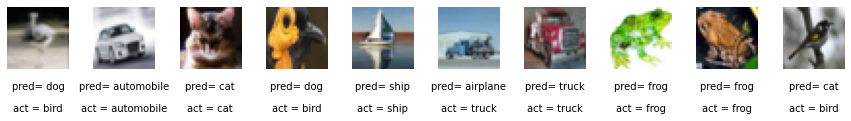

In [36]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred= ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = '+str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)